In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [3]:
# 1. load your training data
#Loading Data set
Stock_Data = pd.read_csv("/content/drive/My Drive/ECE657_a_3/data/q2_dataset.csv")

In [4]:
Stock_Data

,Date,Close/Last,Volume,Open,High,Low
0,07/08/20,$381.37,29272970,376.72,381.50,376.36
1,07/07/20,$372.69,28106110,375.41,378.62,372.23
2,07/06/20,$373.85,29663910,370.00,375.78,369.87
3,07/02/20,$364.11,28510370,367.85,370.47,363.64
4,07/01/20,$364.11,27684310,365.12,367.36,363.91
...,...,...,...,...,...,...
1254,07/15/2015,$126.82,33559770,125.72,127.15,125.58
1255,07/14/2015,$125.61,31695870,126.04,126.37,125.04
1256,07/13/2015,$125.66,41365600,125.03,125.76,124.32
1257,07/10/15,$123.28,61292800,121.94,123.85,121.21


In [5]:
store_data=np.zeros((1258,13))
store_data.shape

(1258, 13)

In [6]:
'''
	The dataset was created in such a way to predict the next day opening price using 
	the past 3 days Open, High, and Low prices and volume. So each sample contains 
	12 features and 1 target. 

'''
date_time=[]
for i in range(len(store_data)-2):
  # print(i)
  #target
  store_data[i][12]=Stock_Data.iloc[i+3][3]
  
  #date
  date_time.append(Stock_Data.iloc[i+3][0])

  #open -1
  store_data[i][0]=Stock_Data.iloc[i+2][3]
  #open -2
  store_data[i][1]=Stock_Data.iloc[i+1][3]
  #open -3
  store_data[i][2]=Stock_Data.iloc[i][3]

  #High -1
  store_data[i][3]=Stock_Data.iloc[i+2][4]
  #High -2
  store_data[i][4]=Stock_Data.iloc[i+1][4]
  #High -3
  store_data[i][5]=Stock_Data.iloc[i][4]

  #Low -1
  store_data[i][6]=Stock_Data.iloc[i+2][5]
  #Low -2
  store_data[i][7]=Stock_Data.iloc[i+1][5]
  #Low -3
  store_data[i][8]=Stock_Data.iloc[i][5]

  #Low -1
  store_data[i][9]=Stock_Data.iloc[i+2][2]
  #Low -2
  store_data[i][10]=Stock_Data.iloc[i+1][2]
  #Low -3
  store_data[i][11]=Stock_Data.iloc[i][2]

In [7]:
date_time_df=pd.DataFrame(date_time,columns=["Date"])

In [8]:
col_names=['Open-1','Open-2','Open-3','High-1','High-2','High-3','Low-1','Low-2','Low-3','Volume-1','Volume-2','Volume-3','Target']
df=pd.DataFrame(store_data[:-2,:],columns=col_names)

In [9]:
df

,Open-1,Open-2,Open-3,High-1,High-2,High-3,Low-1,Low-2,Low-3,Volume-1,Volume-2,Volume-3,Target
0,370.00,375.41,376.72,375.78,378.62,381.50,369.87,372.23,376.36,29663910.0,28106110.0,29272970.0,367.85
1,367.85,370.00,375.41,370.47,375.78,378.62,363.64,369.87,372.23,28510370.0,29663910.0,28106110.0,365.12
2,365.12,367.85,370.00,367.36,370.47,375.78,363.91,363.64,369.87,27684310.0,28510370.0,29663910.0,360.08
3,360.08,365.12,367.85,365.98,367.36,370.47,360.00,363.91,363.64,35055820.0,27684310.0,28510370.0,353.25
4,353.25,360.08,365.12,362.17,365.98,367.36,351.28,360.00,363.91,32661520.0,35055820.0,27684310.0,364.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1251,127.74,129.08,130.97,128.57,129.62,132.97,127.35,128.31,130.70,35987630.0,45970470.0,55204920.0,125.72
1252,125.72,127.74,129.08,127.15,128.57,129.62,125.58,127.35,128.31,33559770.0,35987630.0,45970470.0,126.04
1253,126.04,125.72,127.74,126.37,127.15,128.57,125.04,125.58,127.35,31695870.0,33559770.0,35987630.0,125.03
1254,125.03,126.04,125.72,125.76,126.37,127.15,124.32,125.04,125.58,41365600.0,31695870.0,33559770.0,121.94


In [10]:
data=df.drop(['Target'],axis=1)

In [11]:
data

,Open-1,Open-2,Open-3,High-1,High-2,High-3,Low-1,Low-2,Low-3,Volume-1,Volume-2,Volume-3
0,370.00,375.41,376.72,375.78,378.62,381.50,369.87,372.23,376.36,29663910.0,28106110.0,29272970.0
1,367.85,370.00,375.41,370.47,375.78,378.62,363.64,369.87,372.23,28510370.0,29663910.0,28106110.0
2,365.12,367.85,370.00,367.36,370.47,375.78,363.91,363.64,369.87,27684310.0,28510370.0,29663910.0
3,360.08,365.12,367.85,365.98,367.36,370.47,360.00,363.91,363.64,35055820.0,27684310.0,28510370.0
4,353.25,360.08,365.12,362.17,365.98,367.36,351.28,360.00,363.91,32661520.0,35055820.0,27684310.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1251,127.74,129.08,130.97,128.57,129.62,132.97,127.35,128.31,130.70,35987630.0,45970470.0,55204920.0
1252,125.72,127.74,129.08,127.15,128.57,129.62,125.58,127.35,128.31,33559770.0,35987630.0,45970470.0
1253,126.04,125.72,127.74,126.37,127.15,128.57,125.04,125.58,127.35,31695870.0,33559770.0,35987630.0
1254,125.03,126.04,125.72,125.76,126.37,127.15,124.32,125.04,125.58,41365600.0,31695870.0,33559770.0


In [12]:
frames = [data,date_time_df]
data_date_df = pd.concat(frames,axis=1)

In [13]:
data_date_df

,Open-1,Open-2,Open-3,High-1,High-2,High-3,Low-1,Low-2,Low-3,Volume-1,Volume-2,Volume-3,Date
0,370.00,375.41,376.72,375.78,378.62,381.50,369.87,372.23,376.36,29663910.0,28106110.0,29272970.0,07/02/20
1,367.85,370.00,375.41,370.47,375.78,378.62,363.64,369.87,372.23,28510370.0,29663910.0,28106110.0,07/01/20
2,365.12,367.85,370.00,367.36,370.47,375.78,363.91,363.64,369.87,27684310.0,28510370.0,29663910.0,06/30/2020
3,360.08,365.12,367.85,365.98,367.36,370.47,360.00,363.91,363.64,35055820.0,27684310.0,28510370.0,06/29/2020
4,353.25,360.08,365.12,362.17,365.98,367.36,351.28,360.00,363.91,32661520.0,35055820.0,27684310.0,06/26/2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1251,127.74,129.08,130.97,128.57,129.62,132.97,127.35,128.31,130.70,35987630.0,45970470.0,55204920.0,07/15/2015
1252,125.72,127.74,129.08,127.15,128.57,129.62,125.58,127.35,128.31,33559770.0,35987630.0,45970470.0,07/14/2015
1253,126.04,125.72,127.74,126.37,127.15,128.57,125.04,125.58,127.35,31695870.0,33559770.0,35987630.0,07/13/2015
1254,125.03,126.04,125.72,125.76,126.37,127.15,124.32,125.04,125.58,41365600.0,31695870.0,33559770.0,07/10/15


In [14]:
#the dataset was randomized to create ‘train_data_RNN.csv’ and ‘test_data_RNN.csv.
ran = 42
X_train_date, X_test_date, y_train, y_test = train_test_split(data_date_df, df['Target'], test_size=0.3, random_state = ran) 

In [15]:
X_train=X_train_date.drop(['Date'],axis=1)
X_train

,Open-1,Open-2,Open-3,High-1,High-2,High-3,Low-1,Low-2,Low-3,Volume-1,Volume-2,Volume-3
1149,117.64,116.04,115.19,117.69,116.94,115.39,115.08,115.51,112.85,46301930.0,29158640.0,46810020.0
905,111.43,110.78,111.60,112.47,112.03,112.20,111.39,110.07,110.27,27054320.0,28507780.0,36151450.0
724,160.52,157.86,157.50,160.71,159.50,157.89,157.84,156.72,155.11,27377960.0,27391950.0,26330070.0
552,162.62,164.12,164.00,165.42,165.73,164.33,162.41,163.37,160.63,28331540.0,27850370.0,35617230.0
66,255.60,246.50,240.34,262.49,248.72,245.15,252.00,239.13,236.90,49250500.0,44054640.0,41483490.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1044,93.48,92.72,90.00,93.57,92.78,91.67,92.46,89.47,90.00,28641180.0,76183460.0,44223040.0
1095,96.86,97.65,100.51,98.23,100.77,100.89,96.65,97.42,99.64,35131460.0,50303500.0,33136130.0
1130,98.68,98.55,98.97,100.13,99.11,99.06,96.43,96.76,97.34,80742460.0,70722000.0,49687870.0
860,127.98,128.31,129.13,129.39,129.19,130.50,127.78,128.16,128.90,33671250.0,24460160.0,26784530.0


In [16]:
train_data=pd.concat([X_train,y_train],axis=1)

In [17]:
train_data

,Open-1,Open-2,Open-3,High-1,High-2,High-3,Low-1,Low-2,Low-3,Volume-1,Volume-2,Volume-3,Target
1149,117.64,116.04,115.19,117.69,116.94,115.39,115.08,115.51,112.85,46301930.0,29158640.0,46810020.0,117.52
905,111.43,110.78,111.60,112.47,112.03,112.20,111.39,110.07,110.27,27054320.0,28507780.0,36151450.0,111.13
724,160.52,157.86,157.50,160.71,159.50,157.89,157.84,156.72,155.11,27377960.0,27391950.0,26330070.0,161.94
552,162.62,164.12,164.00,165.42,165.73,164.33,162.41,163.37,160.63,28331540.0,27850370.0,35617230.0,165.67
66,255.60,246.50,240.34,262.49,248.72,245.15,252.00,239.13,236.90,49250500.0,44054640.0,41483490.0,250.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1044,93.48,92.72,90.00,93.57,92.78,91.67,92.46,89.47,90.00,28641180.0,76183460.0,44223040.0,93.33
1095,96.86,97.65,100.51,98.23,100.77,100.89,96.65,97.42,99.64,35131460.0,50303500.0,33136130.0,97.20
1130,98.68,98.55,98.97,100.13,99.11,99.06,96.43,96.76,97.34,80742460.0,70722000.0,49687870.0,100.56
860,127.98,128.31,129.13,129.39,129.19,130.50,127.78,128.16,128.90,33671250.0,24460160.0,26784530.0,127.03


In [18]:
X_test_date

,Open-1,Open-2,Open-3,High-1,High-2,High-3,Low-1,Low-2,Low-3,Volume-1,Volume-2,Volume-3,Date
435,225.46,214.52,220.42,226.35,219.50,222.88,216.05,212.32,216.84,41084070.0,52902320.0,39494770.0,10/09/18
101,314.18,323.60,321.47,321.55,323.90,327.22,313.85,318.71,321.47,27337220.0,23580780.0,28432570.0,02/07/20
51,273.61,275.87,277.20,277.90,281.75,283.01,272.20,274.87,277.00,29264340.0,31203580.0,31627180.0,04/21/2020
63,242.80,250.90,270.80,245.70,263.11,271.70,238.97,249.38,259.00,32470020.0,50455070.0,50721830.0,04/02/20
1151,118.98,117.52,117.64,119.86,118.60,117.69,117.81,116.86,115.08,32063100.0,34275420.0,46301930.0,12/04/15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,115.80,116.74,116.80,117.38,117.50,117.40,115.75,116.68,116.78,27756760.0,21337310.0,23724430.0,12/16/2016
752,144.11,144.73,145.87,145.95,145.85,146.18,143.37,144.38,144.82,21080580.0,18647220.0,24833800.0,07/07/17
823,140.91,143.68,144.19,144.04,144.49,144.50,140.62,143.19,143.50,33348400.0,29174040.0,21189000.0,03/27/2017
377,144.53,148.70,149.56,148.55,148.83,151.82,143.80,145.90,148.52,57423650.0,54571440.0,40622910.0,01/03/19


In [19]:
X_test_date['Date'] =pd.to_datetime(X_test_date.Date)
X_test_date=X_test_date.sort_values(by='Date') # This now sorts in date order
X_test_date

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Open-1,Open-2,Open-3,High-1,High-2,High-3,Low-1,Low-2,Low-3,Volume-1,Volume-2,Volume-3,Date
1255,121.94,125.03,126.04,123.85,125.76,126.37,121.21,124.32,125.04,61292800.0,41365600.0,31695870.0,2015-07-09
1251,127.74,129.08,130.97,128.57,129.62,132.97,127.35,128.31,130.70,35987630.0,45970470.0,55204920.0,2015-07-15
1249,130.97,132.85,121.99,132.97,132.92,125.50,130.70,130.32,121.99,55204920.0,73006780.0,115288400.0,2015-07-17
1248,132.85,121.99,126.20,132.92,125.50,127.09,130.32,121.99,125.06,73006780.0,115288400.0,50832950.0,2015-07-20
1247,121.99,126.20,125.32,125.50,127.09,125.74,121.99,125.06,123.90,115288400.0,50832950.0,42090320.0,2015-07-21
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29,315.77,323.50,316.14,319.23,324.24,318.71,315.35,316.50,313.09,20450750.0,31380450.0,28236270.0,2020-05-21
23,320.75,324.66,324.39,323.44,326.20,325.62,318.93,322.30,320.78,21910700.0,26122800.0,21890090.0,2020-06-01
10,354.64,351.34,364.00,356.56,359.46,372.38,345.15,351.15,362.27,66118950.0,33861320.0,53038870.0,2020-06-18
5,364.41,353.25,360.08,365.32,362.17,365.98,353.02,351.28,360.00,51314210.0,32661520.0,35055820.0,2020-06-25


In [20]:
y_test = y_test.reindex(X_test_date.index)

In [21]:
X_test=X_test_date.drop(['Date'],axis=1)
X_test

,Open-1,Open-2,Open-3,High-1,High-2,High-3,Low-1,Low-2,Low-3,Volume-1,Volume-2,Volume-3
1255,121.94,125.03,126.04,123.85,125.76,126.37,121.21,124.32,125.04,61292800.0,41365600.0,31695870.0
1251,127.74,129.08,130.97,128.57,129.62,132.97,127.35,128.31,130.70,35987630.0,45970470.0,55204920.0
1249,130.97,132.85,121.99,132.97,132.92,125.50,130.70,130.32,121.99,55204920.0,73006780.0,115288400.0
1248,132.85,121.99,126.20,132.92,125.50,127.09,130.32,121.99,125.06,73006780.0,115288400.0,50832950.0
1247,121.99,126.20,125.32,125.50,127.09,125.74,121.99,125.06,123.90,115288400.0,50832950.0,42090320.0
...,...,...,...,...,...,...,...,...,...,...,...,...
29,315.77,323.50,316.14,319.23,324.24,318.71,315.35,316.50,313.09,20450750.0,31380450.0,28236270.0
23,320.75,324.66,324.39,323.44,326.20,325.62,318.93,322.30,320.78,21910700.0,26122800.0,21890090.0
10,354.64,351.34,364.00,356.56,359.46,372.38,345.15,351.15,362.27,66118950.0,33861320.0,53038870.0
5,364.41,353.25,360.08,365.32,362.17,365.98,353.02,351.28,360.00,51314210.0,32661520.0,35055820.0


In [22]:
test_data=pd.concat([X_test,y_test],axis=1)

In [23]:
test_data

,Open-1,Open-2,Open-3,High-1,High-2,High-3,Low-1,Low-2,Low-3,Volume-1,Volume-2,Volume-3,Target
1255,121.94,125.03,126.04,123.85,125.76,126.37,121.21,124.32,125.04,61292800.0,41365600.0,31695870.0,123.85
1251,127.74,129.08,130.97,128.57,129.62,132.97,127.35,128.31,130.70,35987630.0,45970470.0,55204920.0,125.72
1249,130.97,132.85,121.99,132.97,132.92,125.50,130.70,130.32,121.99,55204920.0,73006780.0,115288400.0,129.08
1248,132.85,121.99,126.20,132.92,125.50,127.09,130.32,121.99,125.06,73006780.0,115288400.0,50832950.0,130.97
1247,121.99,126.20,125.32,125.50,127.09,125.74,121.99,125.06,123.90,115288400.0,50832950.0,42090320.0,132.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29,315.77,323.50,316.14,319.23,324.24,318.71,315.35,316.50,313.09,20450750.0,31380450.0,28236270.0,318.66
23,320.75,324.66,324.39,323.44,326.20,325.62,318.93,322.30,320.78,21910700.0,26122800.0,21890090.0,317.75
10,354.64,351.34,364.00,356.56,359.46,372.38,345.15,351.15,362.27,66118950.0,33861320.0,53038870.0,351.41
5,364.41,353.25,360.08,365.32,362.17,365.98,353.02,351.28,360.00,51314210.0,32661520.0,35055820.0,360.70


In [24]:
train_data.to_csv(r'train.csv', index = False, header=True)

In [25]:
test_data.to_csv(r'test.csv', index = False, header=True)

In [26]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Embedding
from keras.layers import LSTM, SimpleRNN, GRU
from keras import callbacks
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger

In [27]:
#scaling the dataset using minmaxscaler
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [28]:
#saving the scaler to apply it on the test dataset
import pickle
with open('scaler_RNN_model','wb') as file_pick:
  pickle.dump(scaler,file_pick)

In [29]:
#numpy array conversion
X_train=np.array(X_train)
X_test=np.array(X_test)

In [30]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [31]:
X_train.shape[0],X_train.shape[1]

(879, 12)

In [32]:
model=Sequential()
#adding LSTM layer with 50 LSTM units
model.add(LSTM(50,return_sequences=True,input_shape=(12,1)))
#adding LSTM layer with 50 LSTM units
model.add(LSTM(50,return_sequences=True))
#adding LSTM layer with 50 LSTM units
model.add(LSTM(50))
#adding dense layer
model.add(Dense(1))
'''
	'mean_squared_error' has been used as loss function
	Optimizer: Here adam optimizer has been used. Adam is an adaptive
	learning rate optimization algorithm that’s been designed specifically for
	training deep neural networks.
'''
model.compile(loss='mean_squared_error',optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto',
      restore_best_weights=True)

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 12, 50)            10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 12, 50)            20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [34]:
lstm_out = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=1500,batch_size=64,verbose=1)

Epoch 1/1500
14/14 [==============================] - 1s 70ms/step - loss: 33504.0742 - val_loss: 32890.6211
Epoch 2/1500
14/14 [==============================] - 0s 8ms/step - loss: 32088.0684 - val_loss: 30788.3242
Epoch 3/1500
14/14 [==============================] - 0s 8ms/step - loss: 30630.4688 - val_loss: 29985.7832
Epoch 4/1500
14/14 [==============================] - 0s 8ms/step - loss: 30058.0859 - val_loss: 29592.8887
Epoch 5/1500
14/14 [==============================] - 0s 8ms/step - loss: 29716.9629 - val_loss: 29282.4375
Epoch 6/1500
14/14 [==============================] - 0s 9ms/step - loss: 29421.8086 - val_loss: 28999.1934
Epoch 7/1500
14/14 [==============================] - 0s 8ms/step - loss: 29149.6523 - val_loss: 28728.4434
Epoch 8/1500
14/14 [==============================] - 0s 9ms/step - loss: 28885.4082 - val_loss: 28469.9922
Epoch 9/1500
14/14 [==============================] - 0s 10ms/step - loss: 28632.7832 - val_loss: 28216.9238
Epoch 10/1500
14/14 [=====

In [35]:
model.save('/content/20858688_RNN_model.h5')

In [36]:
def plot_acc_loss(hist):
  loss = hist.history['loss']
  val_loss = hist.history['val_loss']
  epochs = range(len(loss))

  plt.plot(epochs, loss, 'g', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.legend()
  plt.show()

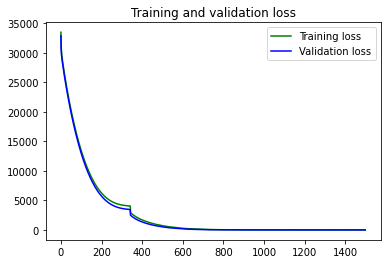

In [37]:
import matplotlib.pyplot as plt
plot_acc_loss(lstm_out)

In [38]:
y_test=np.array(y_test)

In [39]:
y_pred = model.predict(X_test)

In [40]:
result_array=pd.DataFrame({'y_test':y_test, 'y_predicted':y_pred.ravel(),'Date':X_test_date["Date"]},index=None)

In [41]:
result_array=result_array.reset_index(drop=True, inplace=False)
result_array

,y_test,y_predicted,Date
0,123.85,123.682236,2015-07-09
1,125.72,128.437057,2015-07-15
2,129.08,130.907776,2015-07-17
3,130.97,129.237274,2015-07-20
4,132.85,125.027435,2015-07-21
...,...,...,...
372,318.66,315.629517,2020-05-21
373,317.75,318.411926,2020-06-01
374,351.41,349.774261,2020-06-18
375,360.70,359.228638,2020-06-25


Text(0.5, 1.0, 'Comparioson')

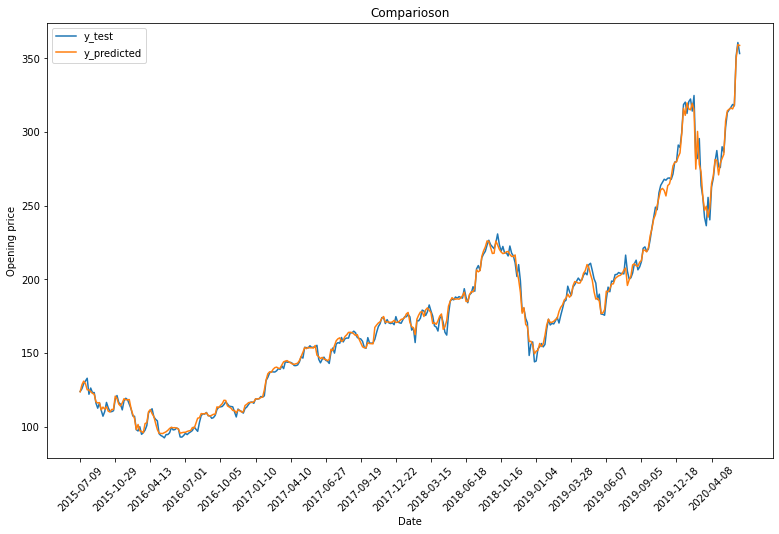

In [42]:
result_array.iloc[0:,0:2].plot.line(figsize=(13,8))
plt.xticks(np.arange(0, 377, step=20), result_array["Date"].dt.date.iloc[lambda x: x.index % 20 == 0],rotation=45)
plt.xlabel('Date')
plt.ylabel('Opening price')
plt.title('Comparioson')